In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Dataset is mix of float and object type 

In [5]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are so many missing values in the dataset.

In [6]:
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

there are so many unique values in the dataset in every columns:

In [7]:
data.isnull().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

Checking percentage of null values :

evaporation and sunshine have 41 and 47 % of null values which is huge in no.

In [8]:
#checking no. of each type of feature:

numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [9]:
print(numerical_feature)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
#droping nulls :

def randomsampleimputation(data, variable):
    data[variable]=data[variable]
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable]=random_sample

In [11]:
randomsampleimputation(data, "Cloud9am")
randomsampleimputation(data, "Cloud3pm")
randomsampleimputation(data, "Evaporation")
randomsampleimputation(data, "Sunshine")

In [12]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,10.0,9.1,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,0.0,1.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,1.4,8.4,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,6.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,3.0,5.9,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,0.0,1.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,12.8,7.0,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,8.0,2.0,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,0.8,10.2,W,28.0,S,...,58.0,27.0,1007.0,1005.7,2.0,6.0,20.1,28.2,Yes,No


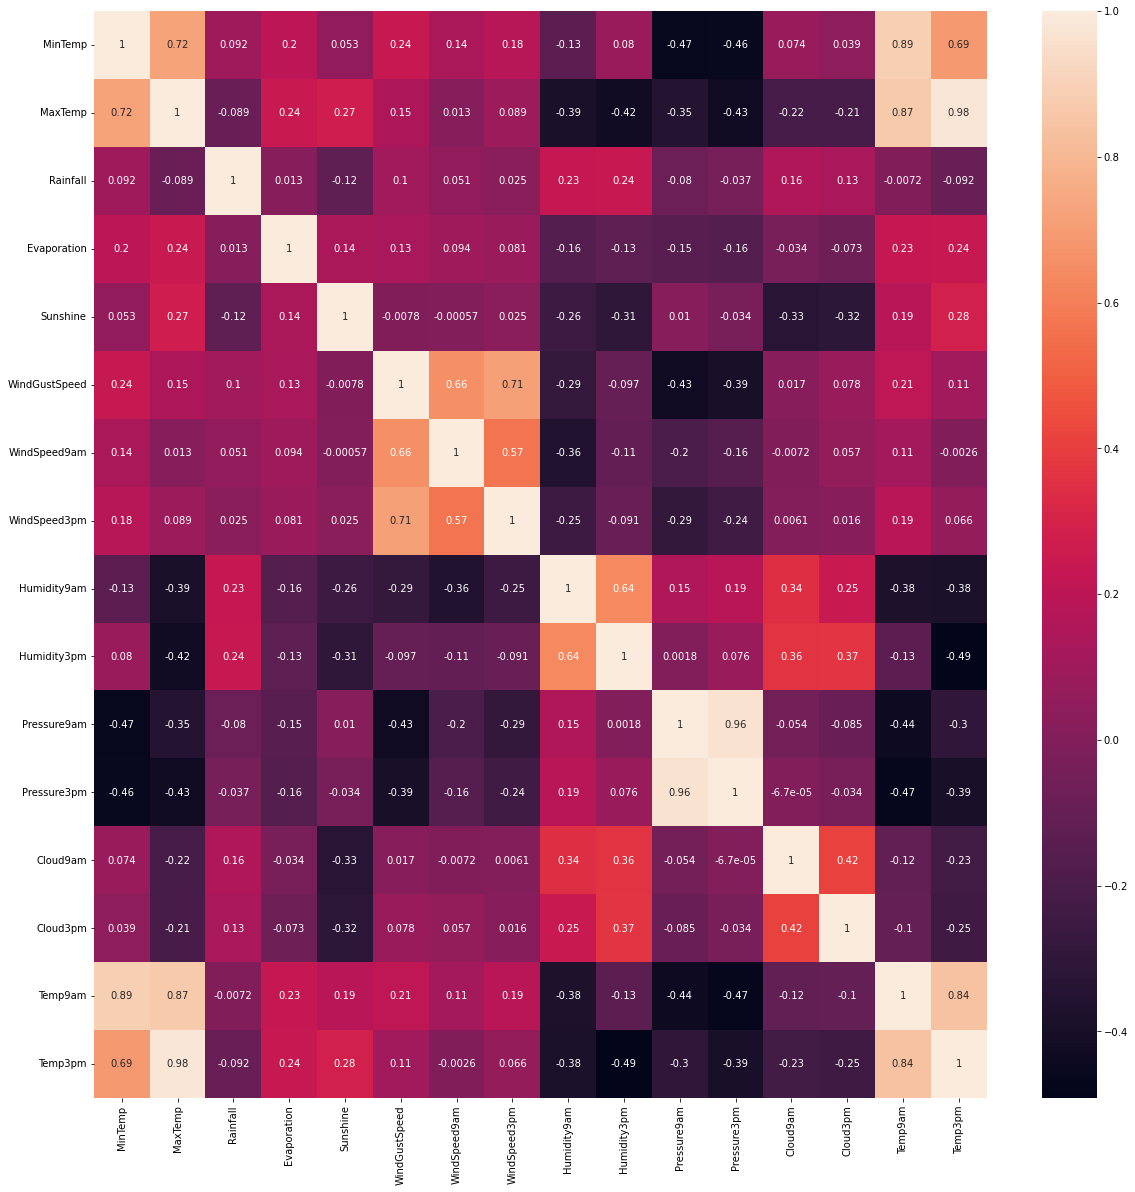

In [13]:
#checking correlation between features using heatmap

corrmat = data.corr()

plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

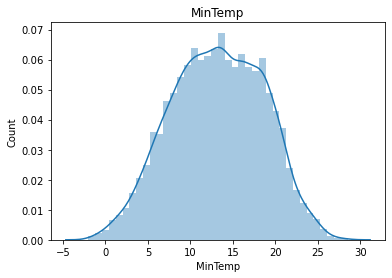

<Figure size 1080x1080 with 0 Axes>

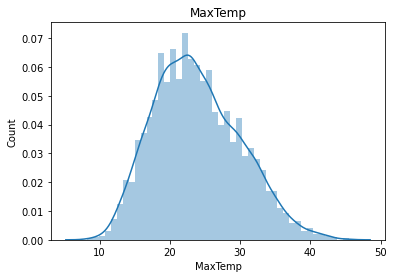

<Figure size 1080x1080 with 0 Axes>

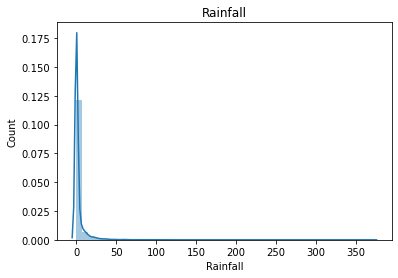

<Figure size 1080x1080 with 0 Axes>

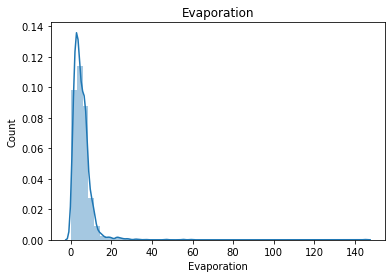

<Figure size 1080x1080 with 0 Axes>

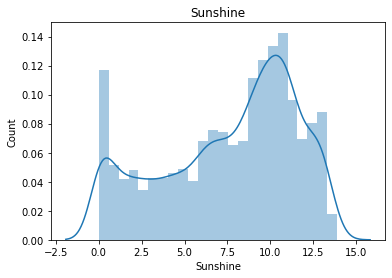

<Figure size 1080x1080 with 0 Axes>

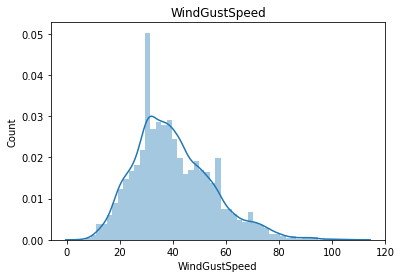

<Figure size 1080x1080 with 0 Axes>

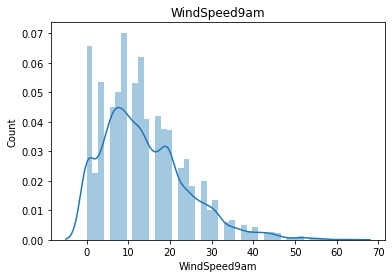

<Figure size 1080x1080 with 0 Axes>

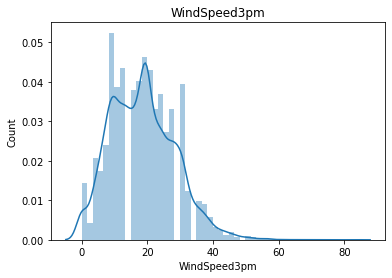

<Figure size 1080x1080 with 0 Axes>

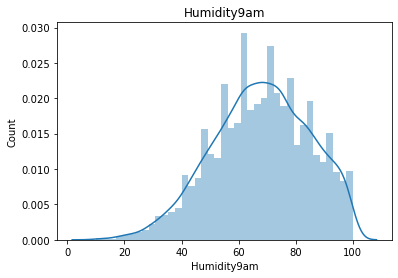

<Figure size 1080x1080 with 0 Axes>

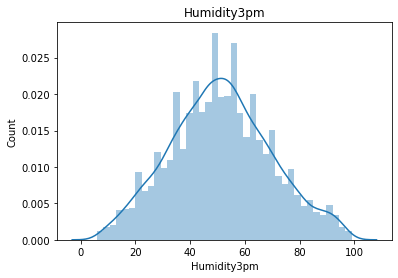

<Figure size 1080x1080 with 0 Axes>

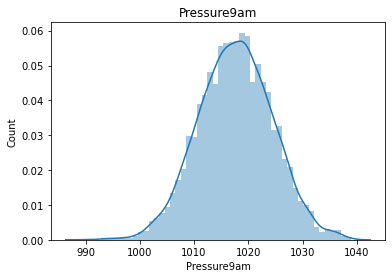

<Figure size 1080x1080 with 0 Axes>

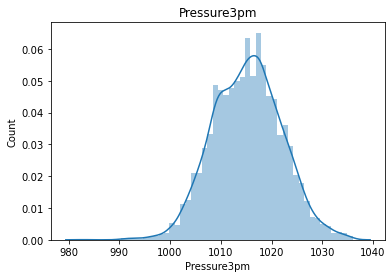

<Figure size 1080x1080 with 0 Axes>

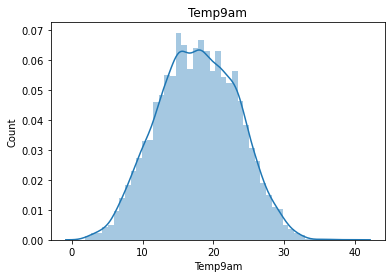

<Figure size 1080x1080 with 0 Axes>

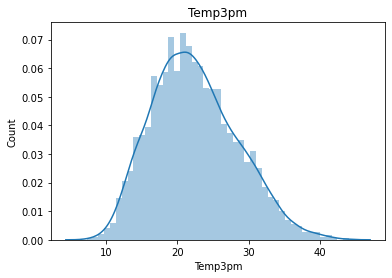

<Figure size 1080x1080 with 0 Axes>

In [14]:
#ploting distribution plot to see the outliers in the continuous features:

for feature in continuous_feature:
    data=data.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

Having lots of outliers in the evaporation,rainfall,windgustspeed,windspeed9am,windspeed3am. they are right skewed.

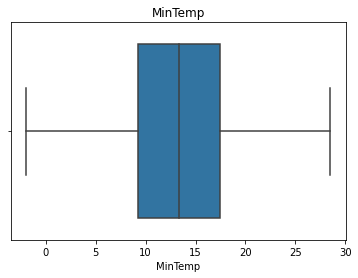

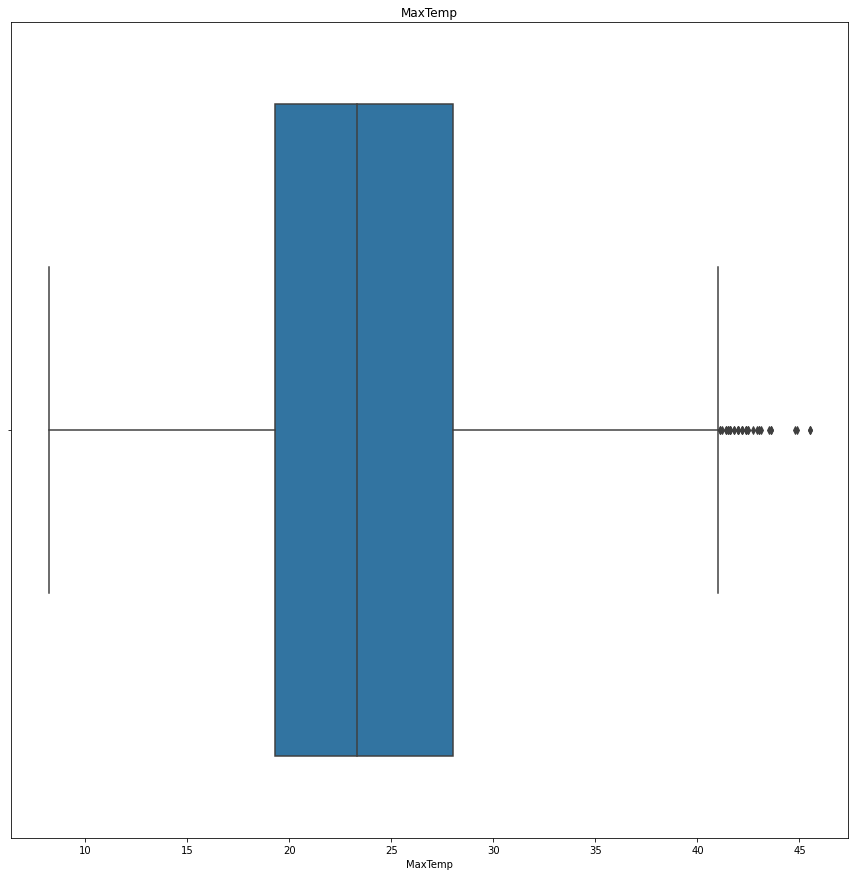

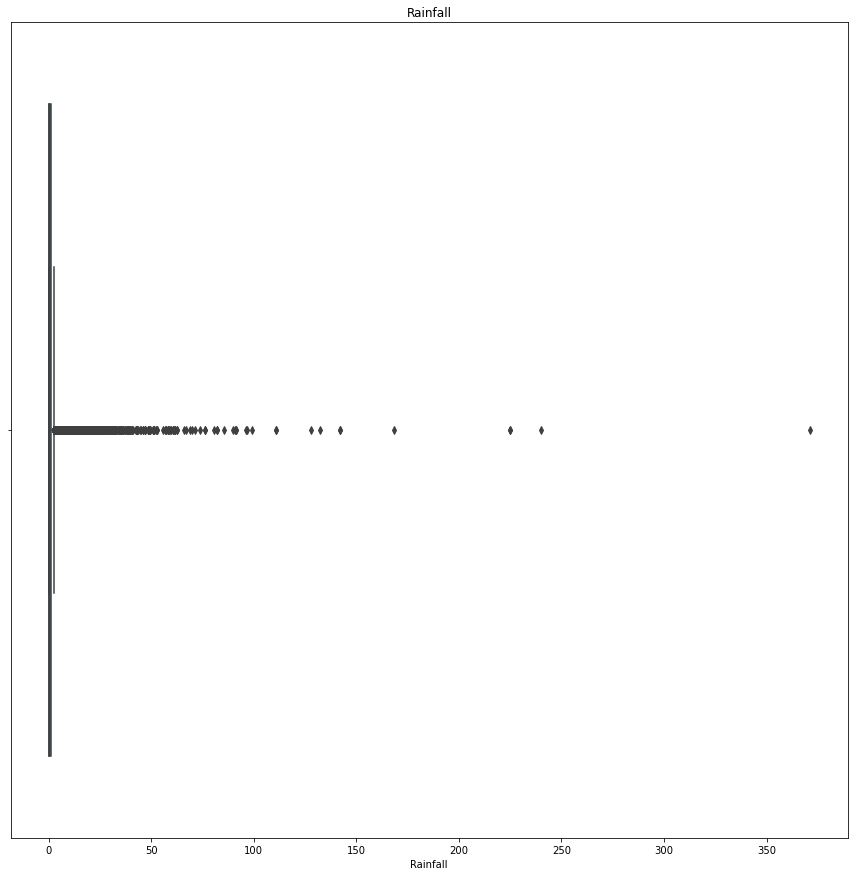

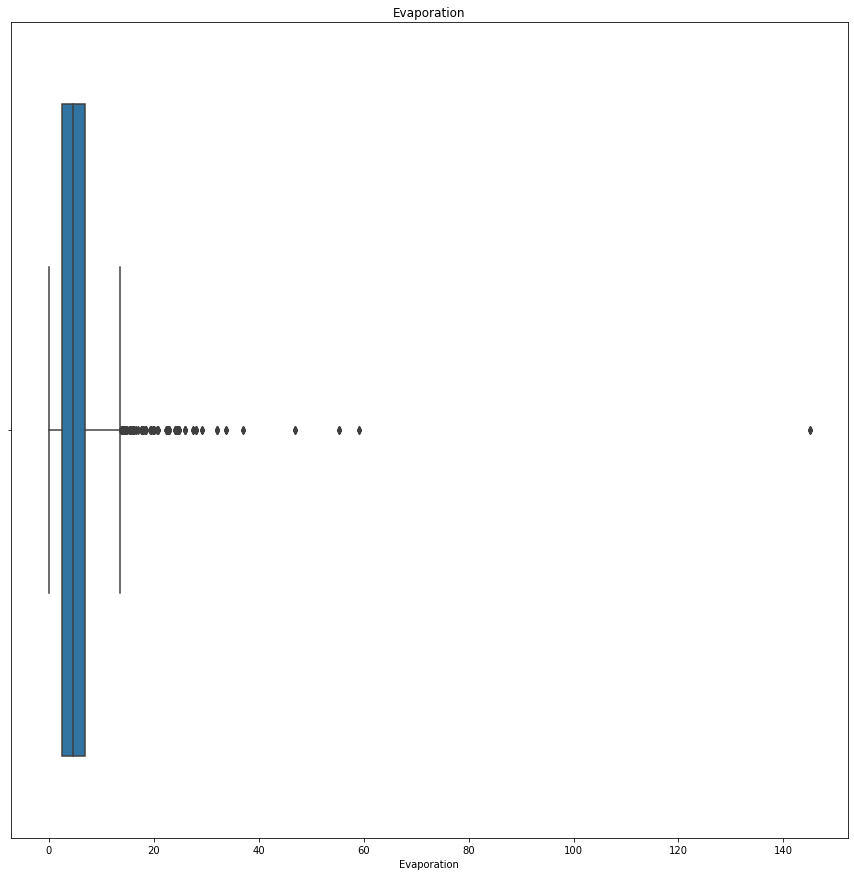

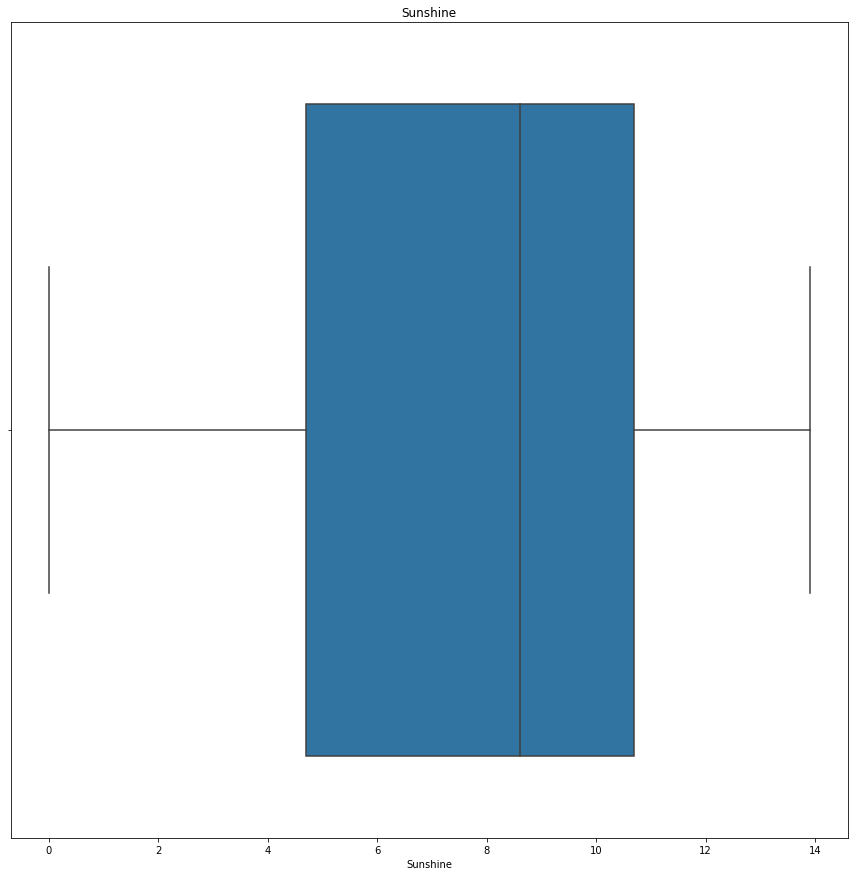

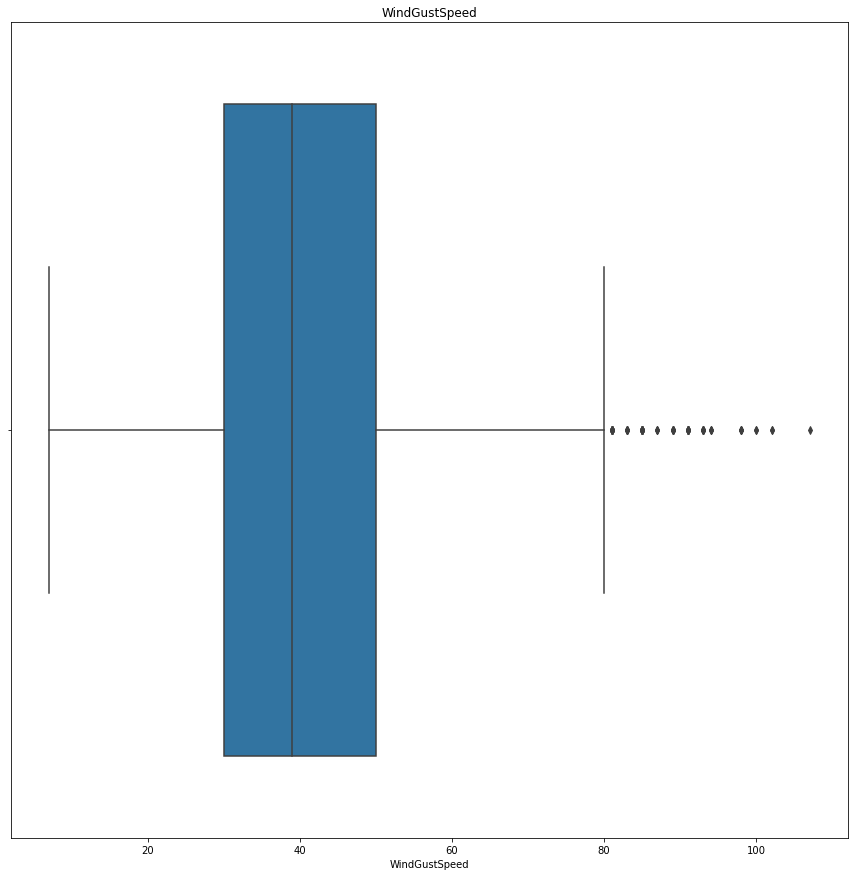

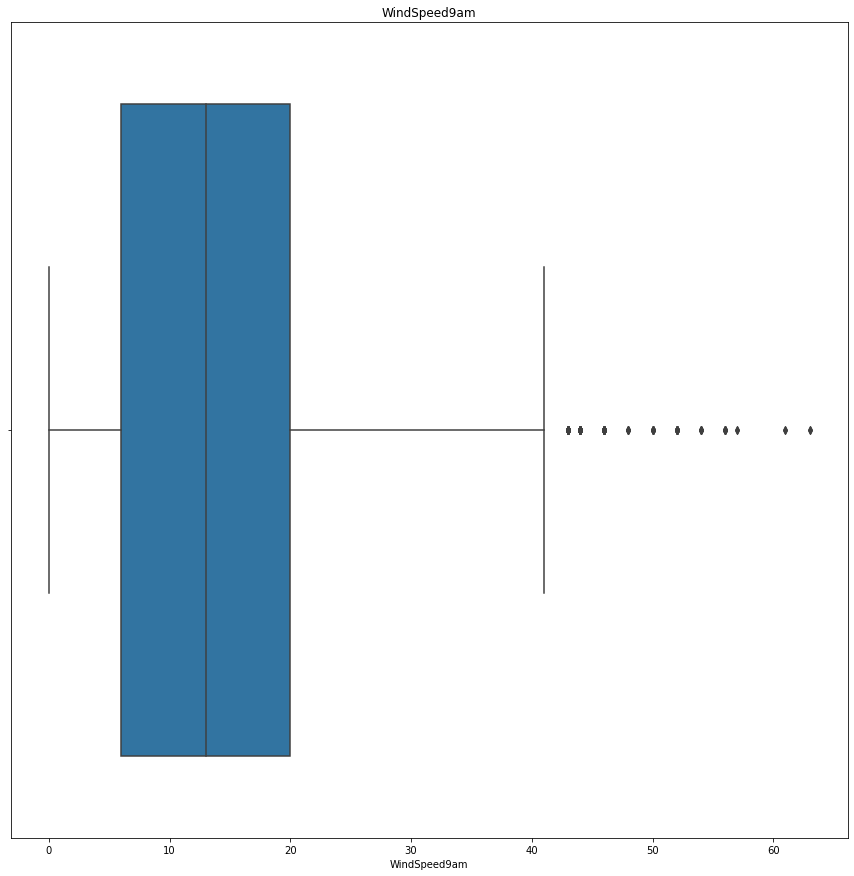

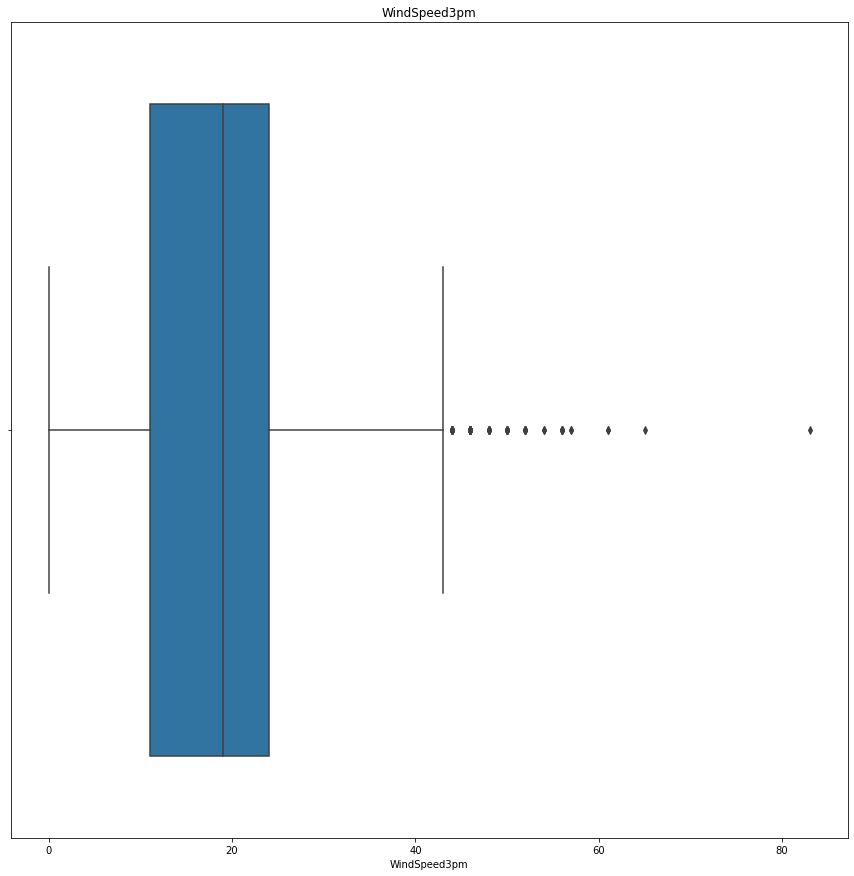

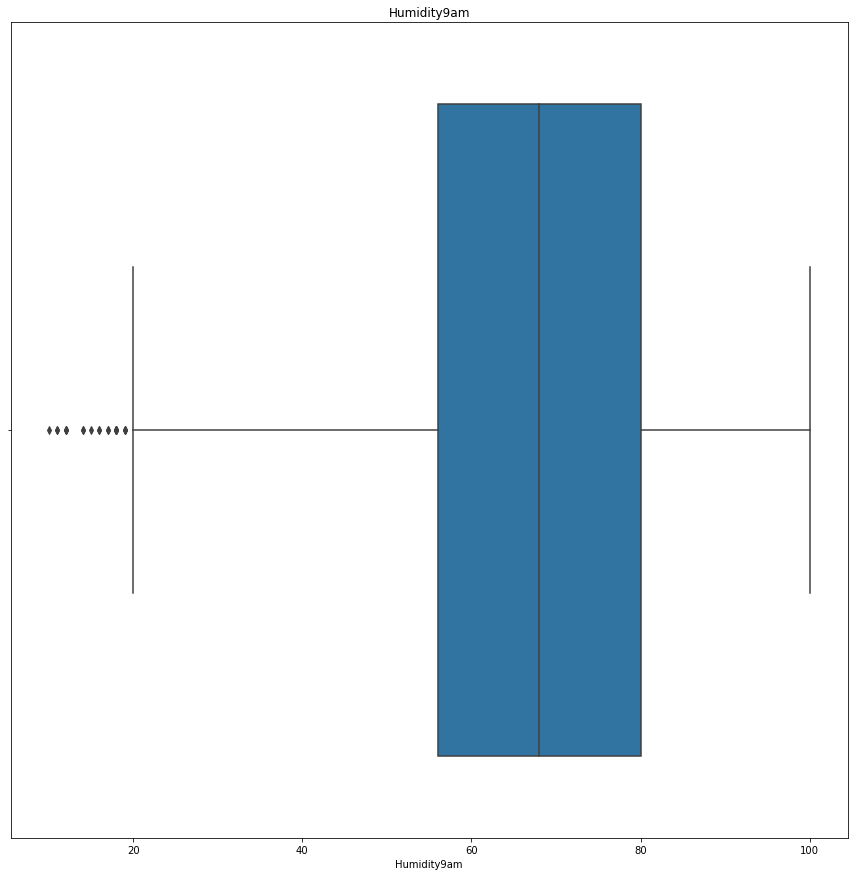

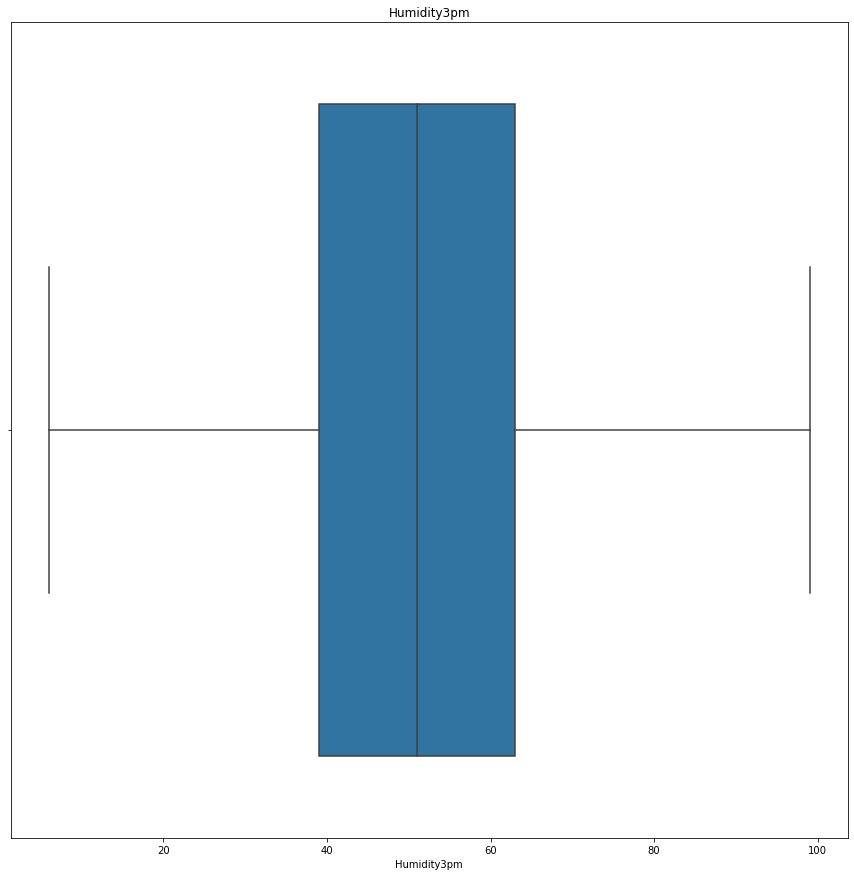

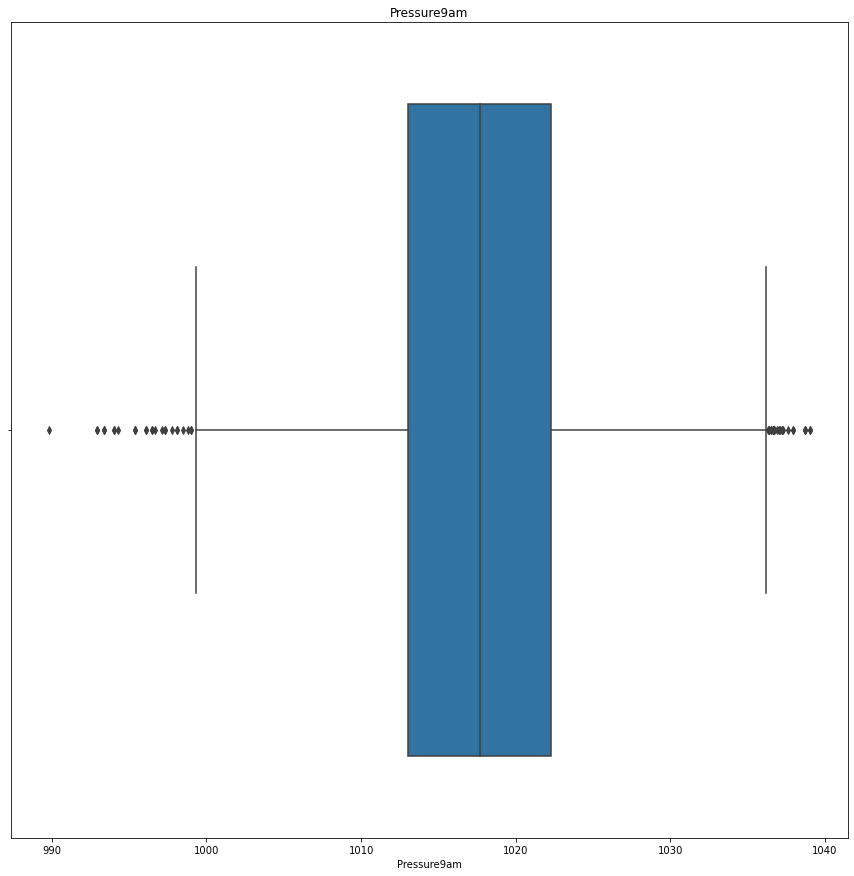

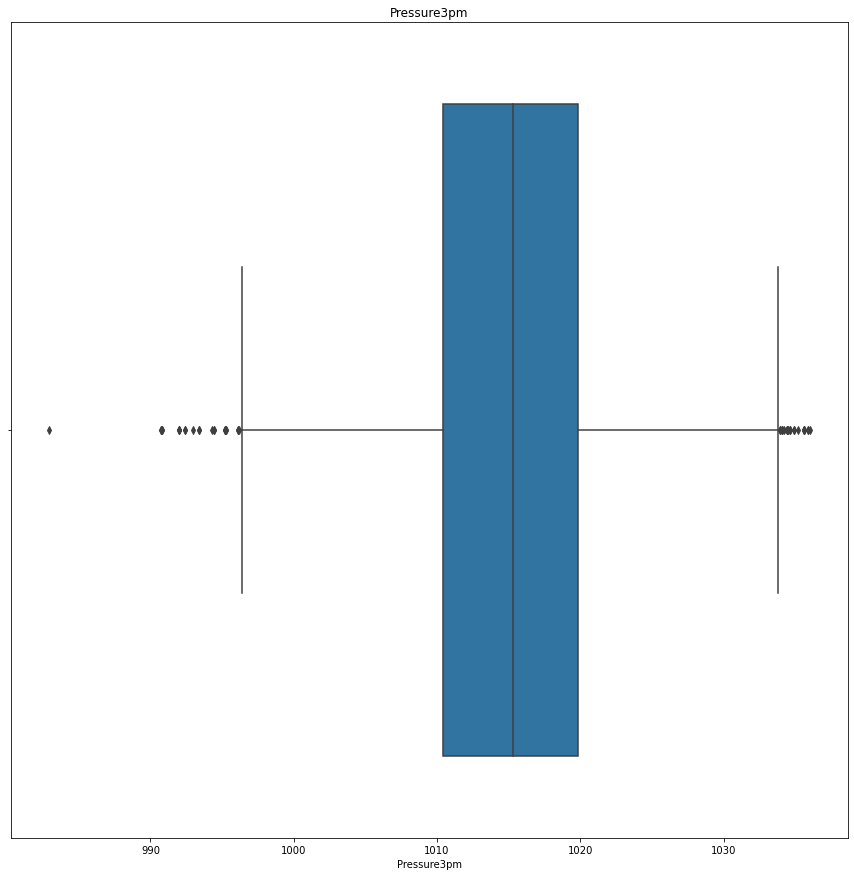

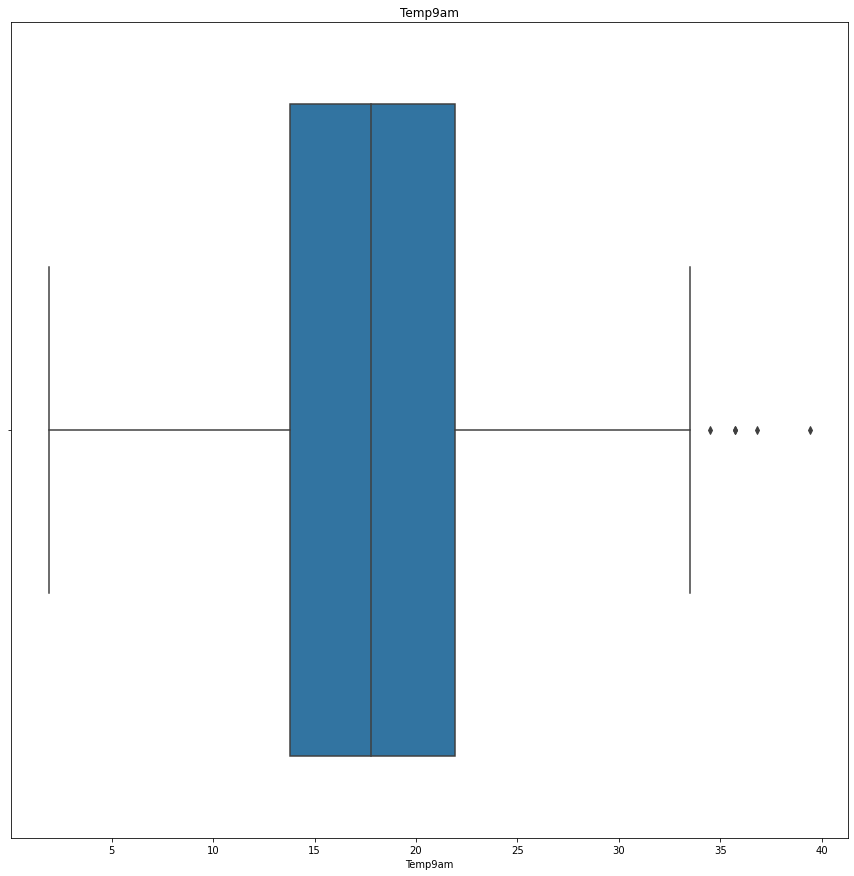

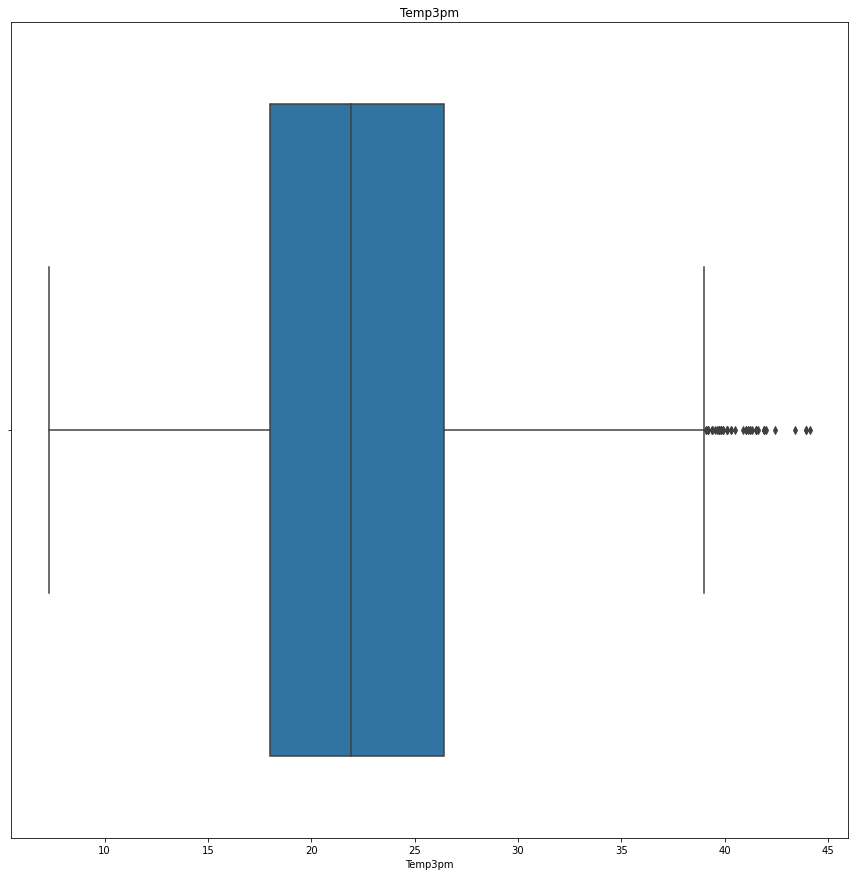

<Figure size 1080x1080 with 0 Axes>

In [15]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [16]:
#imputing the nulls in continuous features:

for feature in continuous_feature:
    if(data[feature].isnull().sum()*100/len(data))>0:
        data[feature] = data[feature].fillna(data[feature].median())

In [17]:
data.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [18]:
print(discrete_feature)


['Cloud9am', 'Cloud3pm']


In [19]:
#imputing the nulls in discrete features using get_dummies:

def mode_nan(data,variable):
    mode=data[variable].value_counts().index[0]
    data[variable].fillna(mode,inplace=True)
mode_nan(data,"Cloud9am")
mode_nan(data,"Cloud3pm")

In [20]:
data["RainToday"] = pd.get_dummies(data["RainToday"], drop_first = True)
data["RainTomorrow"] = pd.get_dummies(data["RainTomorrow"], drop_first = True)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [21]:
#grouping the categorical feature by rain_tomorrow:

for feature in categorical_feature:
    print(feature, (data.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [22]:
#encoding the categorical feature 

windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
data["WindGustDir"] = data["WindGustDir"].map(windgustdir)
data["WindDir9am"] = data["WindDir9am"].map(winddir9am)
data["WindDir3pm"] = data["WindDir3pm"].map(winddir3pm)

In [23]:
#imputing the nulls by using value counts:

data["WindGustDir"] = data["WindGustDir"].fillna(data["WindGustDir"].value_counts().index[0])
data["WindDir9am"] = data["WindDir9am"].fillna(data["WindDir9am"].value_counts().index[0])
data["WindDir3pm"] = data["WindDir3pm"].fillna(data["WindDir3pm"].value_counts().index[0])

In [24]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [25]:
#Grouping the location with rain tomorrow:

df = data.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()


In [26]:
df

RainTomorrow,0,1
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0
Melbourne,1216.0,406.0
Newcastle,624.0,198.0
Penrith,366.0,116.0
PerthAirport,962.0,242.0


In [27]:
df[1].sort_values(ascending = False)


Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [30]:
len(df[1].sort_values(ascending = False).index)


12

In [31]:
#encoding the location feature:

location = {  'Melbourne':1, 'Williamtown':2, 'PerthAirport':3, 'Albury':4, 'Newcastle':5,
       'CoffsHarbour':6, 'Brisbane':7, 'Wollongong':8, 'Penrith':9, 'Adelaide':10,
       'Darwin':11, 'Uluru':12
        }
data["Location"] = data["Location"].map(location)

In [32]:
#cahnging the date and time format:

data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")


In [33]:
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day

In [34]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,4,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,...,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,4,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,...,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,4,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,...,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,4,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,...,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,4,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,12,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,...,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,12,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,...,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,12,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,...,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,12,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

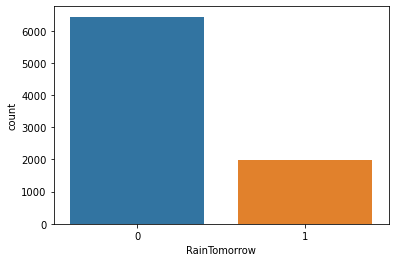

In [35]:
#checking the count of raintomorrow if it is balanced or not: 

sns.countplot(data["RainTomorrow"])


Rain Tomorrow is not balanced we will further deal will it:

# Removing the outliers by finding the inter quantile range #max and min 

In [36]:
IQR=data.MinTemp.quantile(0.75)-data.MinTemp.quantile(0.25)
lower_bridge=data.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


-2.6999999999999993 29.3


In [37]:
data.loc[data['MinTemp']>=29.30,'MinTemp']=29.30
data.loc[data['MinTemp']<=-2.69,'MinTemp']=-2.69


In [38]:
IQR=data.MaxTemp.quantile(0.75)-data.MaxTemp.quantile(0.25)
lower_bridge=data.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [39]:
data.loc[data['MaxTemp']>=41.05,'MaxTemp']=41.05
data.loc[data['MaxTemp']<=6.25,'MaxTemp']=6.25

In [40]:
IQR=data.Rainfall.quantile(0.75)-data.Rainfall.quantile(0.25)
lower_bridge=data.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [41]:
data.loc[data['Rainfall']>=2.0,'Rainfall']=2.0
data.loc[data['Rainfall']<=-1.2,'Rainfall']=-1.2

In [42]:
IQR=data.Evaporation.quantile(0.75)-data.Evaporation.quantile(0.25)
lower_bridge=data.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [43]:
data.loc[data['Evaporation']>=13.6,'Evaporation']=13.6
data.loc[data['Evaporation']<=-4.0,'Evaporation']=-4.0

In [44]:
IQR=data.WindGustSpeed.quantile(0.75)-data.WindGustSpeed.quantile(0.25)
lower_bridge=data.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [45]:
data.loc[data['WindGustSpeed']>=73.5,'WindGustSpeed']=73.5
data.loc[data['WindGustSpeed']<=5.5,'WindGustSpeed']=5.5

In [46]:
IQR=data.WindSpeed9am.quantile(0.75)-data.WindSpeed9am.quantile(0.25)
lower_bridge=data.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [47]:
data.loc[data['WindSpeed9am']>=41,'WindSpeed9am']=41
data.loc[data['WindSpeed9am']<=-15,'WindSpeed9am']=-15

In [48]:
IQR=data.WindSpeed3pm.quantile(0.75)-data.WindSpeed3pm.quantile(0.25)
lower_bridge=data.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [49]:
data.loc[data['WindSpeed3pm']>43.5,'WindSpeed3pm']=43.5
data.loc[data['WindSpeed3pm']<=-8.5,'WindSpeed3pm']=-8.5

In [50]:
IQR=data.Humidity9am.quantile(0.75)-data.Humidity9am.quantile(0.25)
lower_bridge=data.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [51]:
data.loc[data['Humidity9am']>=116,'Humidity9am']=116
data.loc[data['Humidity9am']<=20,'Humidity9am']=20

In [52]:
IQR=data.Pressure9am.quantile(0.75)-data.Pressure9am.quantile(0.25)
lower_bridge=data.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [53]:
data.loc[data['Pressure9am']>=1032.25,'Pressure9am']=1032.25
data.loc[data['Pressure9am']<=1003.05,'Pressure9am']=1003.05

In [54]:
IQR=data.Pressure3pm.quantile(0.75)-data.Pressure3pm.quantile(0.25)
lower_bridge=data.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [55]:
data.loc[data['Pressure3pm']>=1029.89,'Pressure3pm']=1029.89
data.loc[data['Pressure3pm']<=1000.30,'Pressure3pm']=1000.30

In [56]:
IQR=data.Temp9am.quantile(0.75)-data.Temp9am.quantile(0.25)
lower_bridge=data.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [57]:
data.loc[data['Temp9am']>=34.05,'Temp9am']=34.05
data.loc[data['Temp9am']<=1.65,'Temp9am']=1.65

In [58]:
IQR=data.Temp3pm.quantile(0.75)-data.Temp3pm.quantile(0.25)
lower_bridge=data.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [59]:
data.loc[data['Temp3pm']>=38.6,'Temp3pm']=38.6
data.loc[data['Temp3pm']<=5.8,'Temp3pm']=5.8

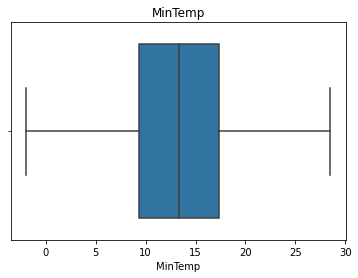

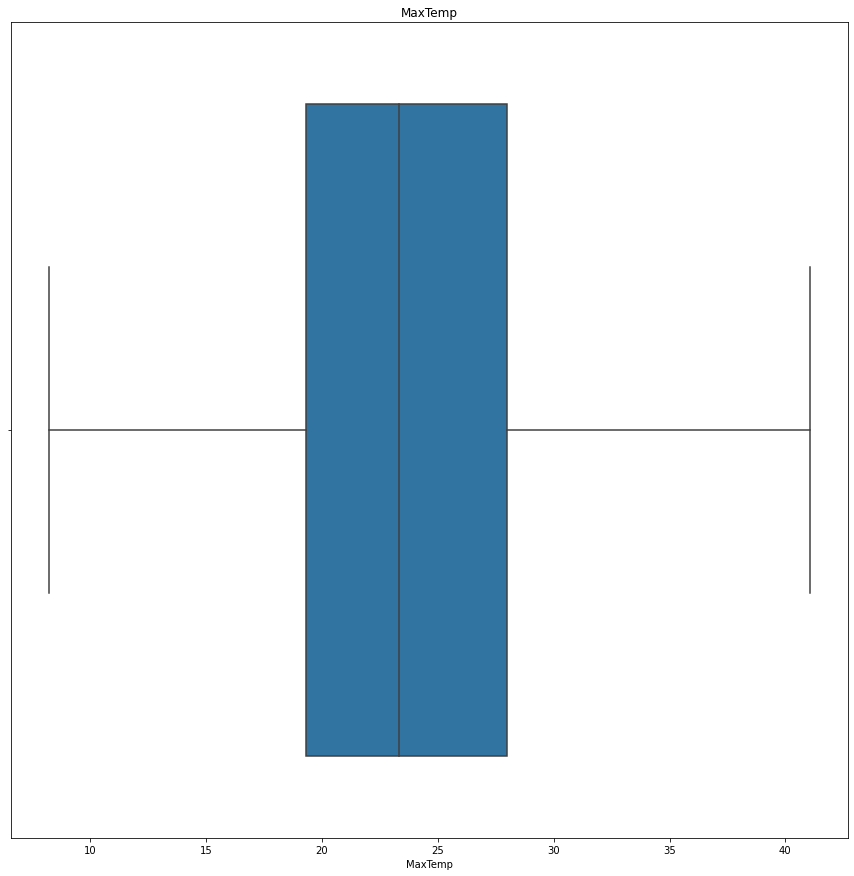

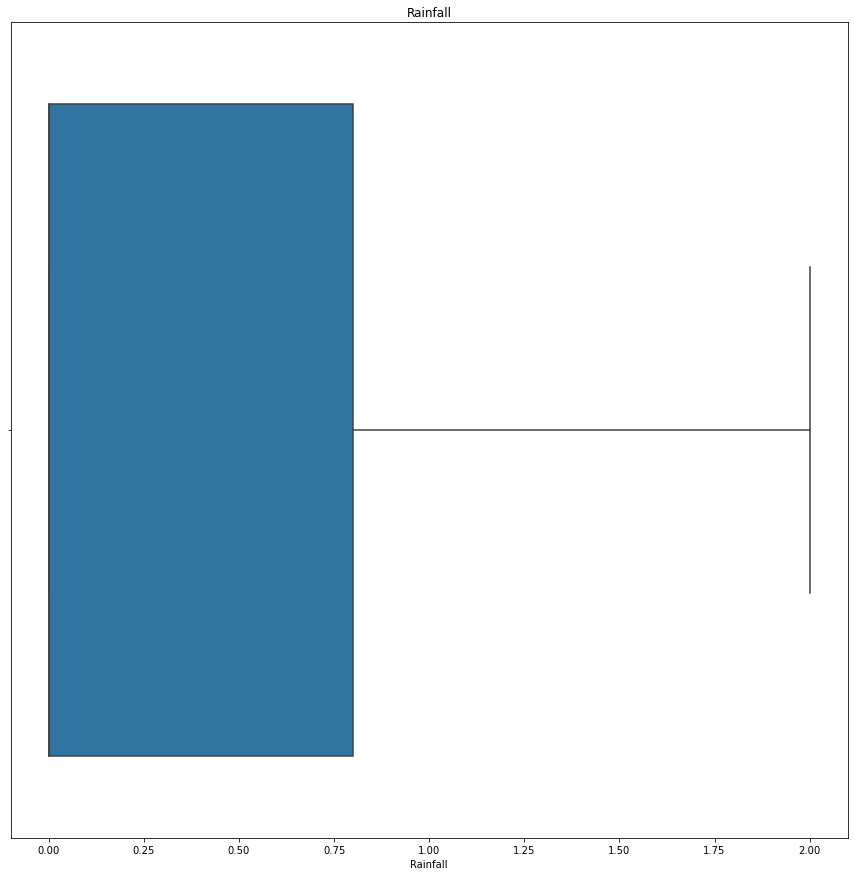

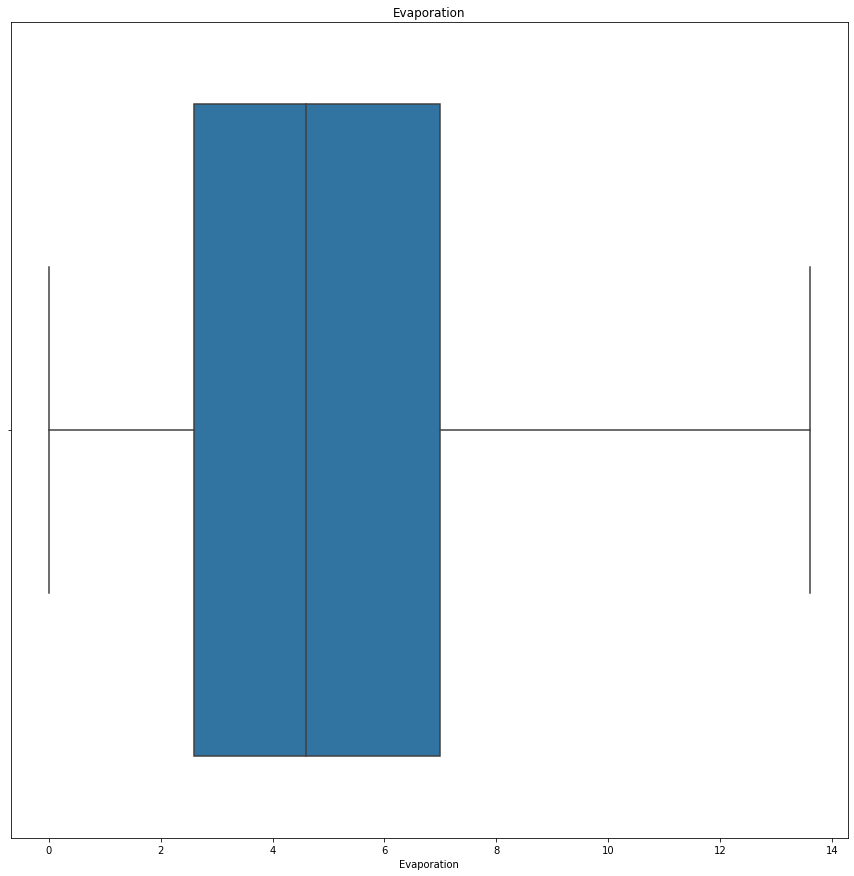

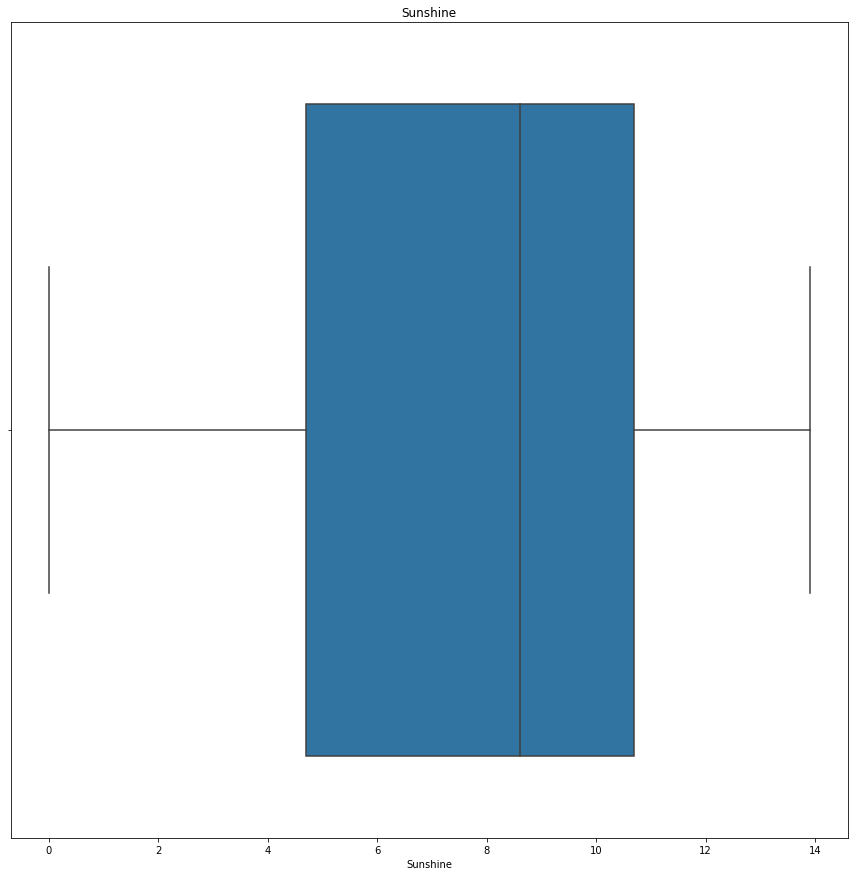

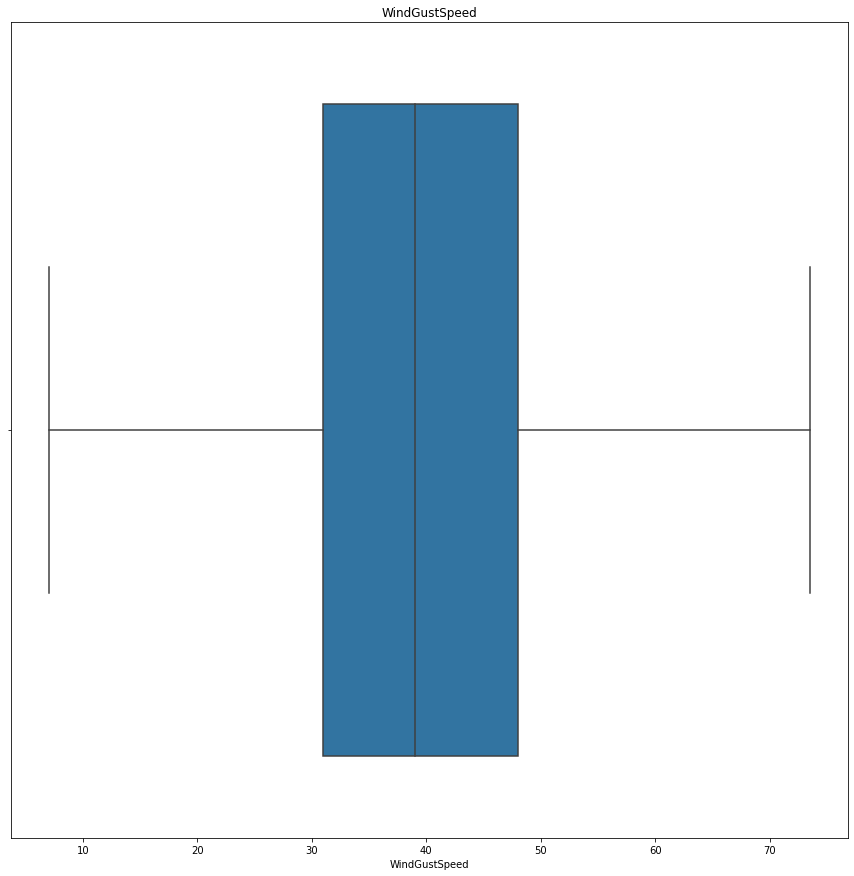

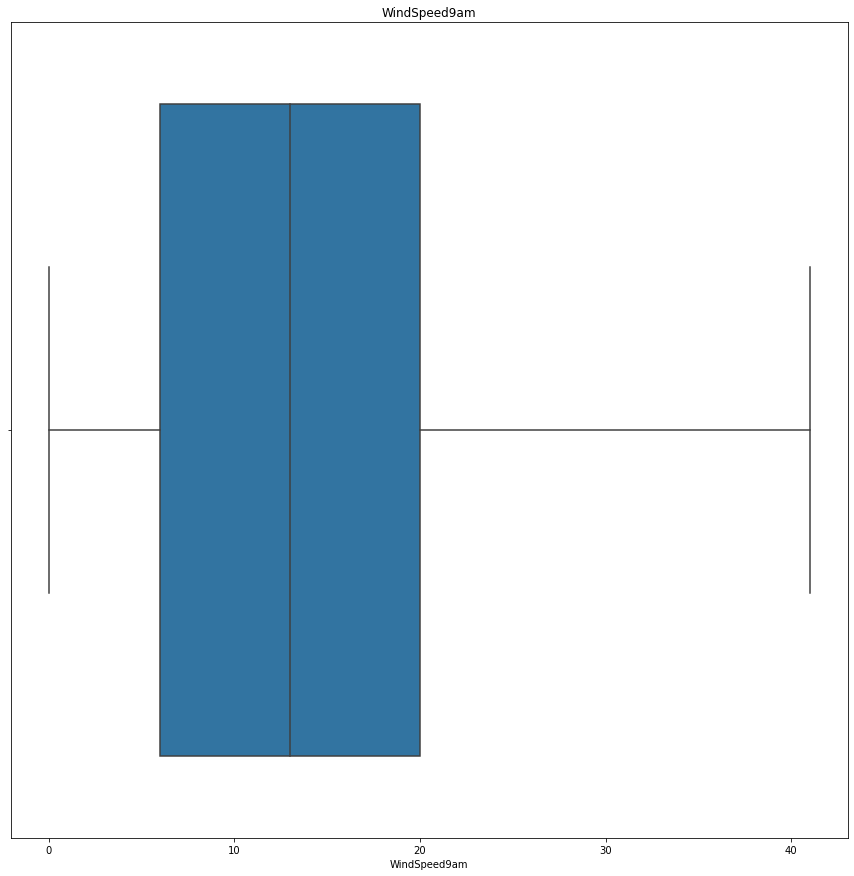

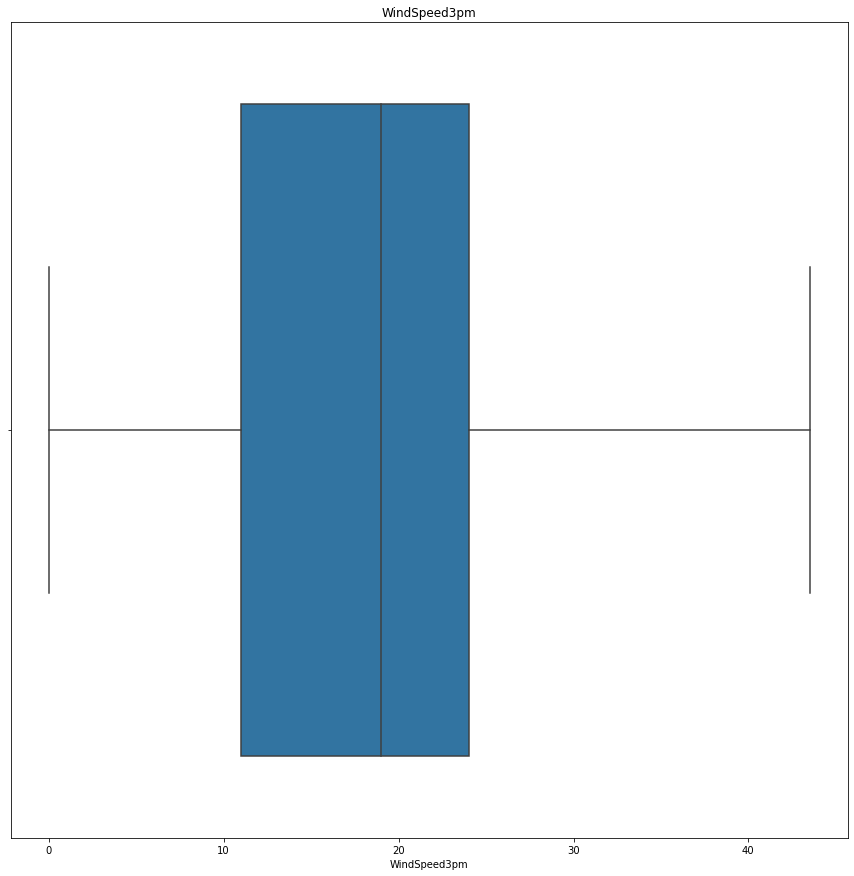

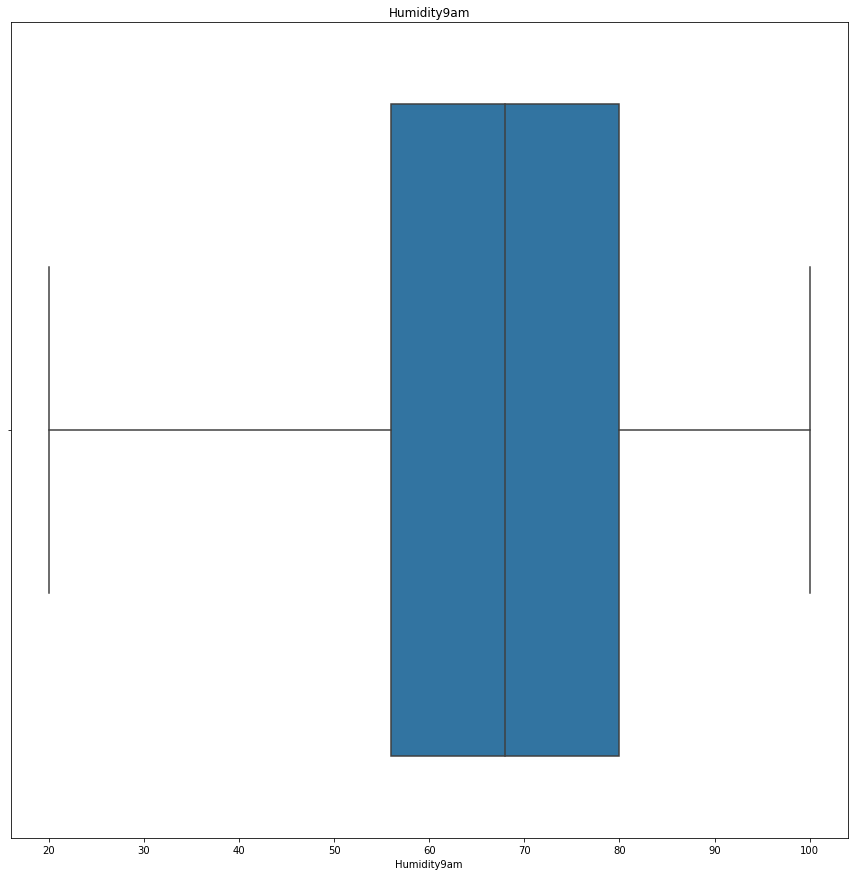

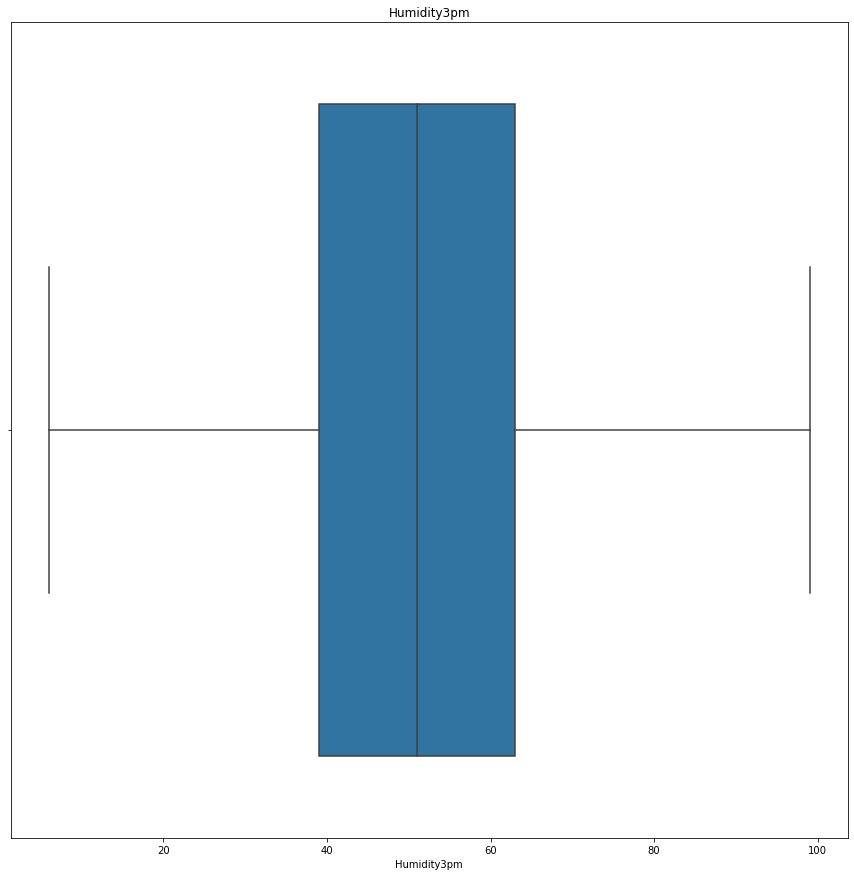

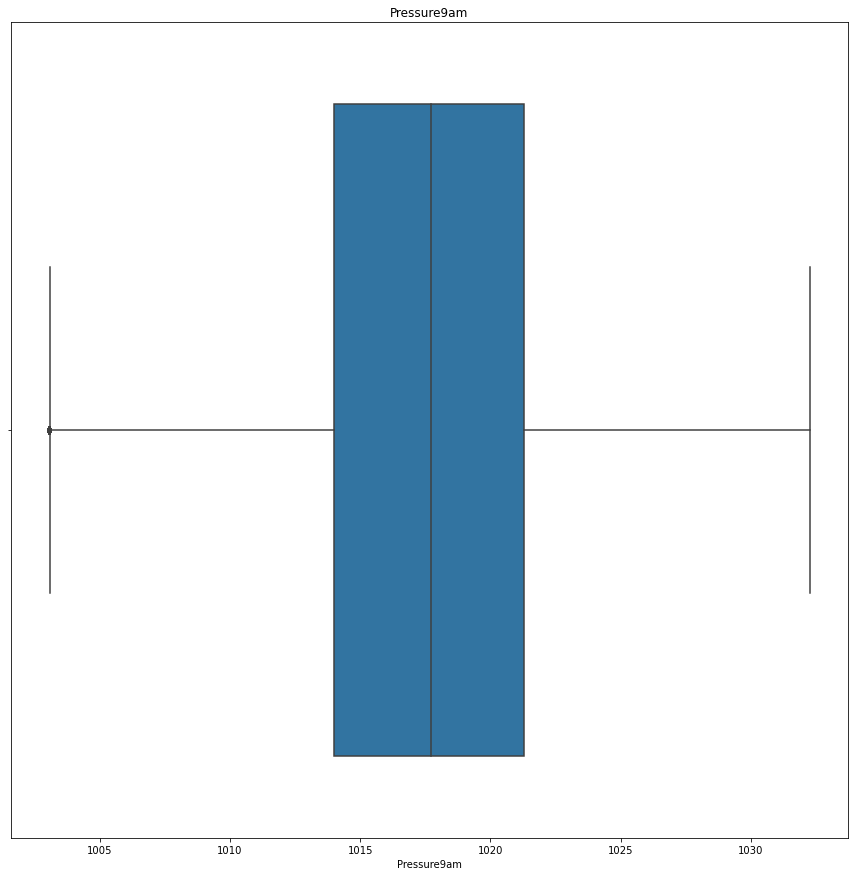

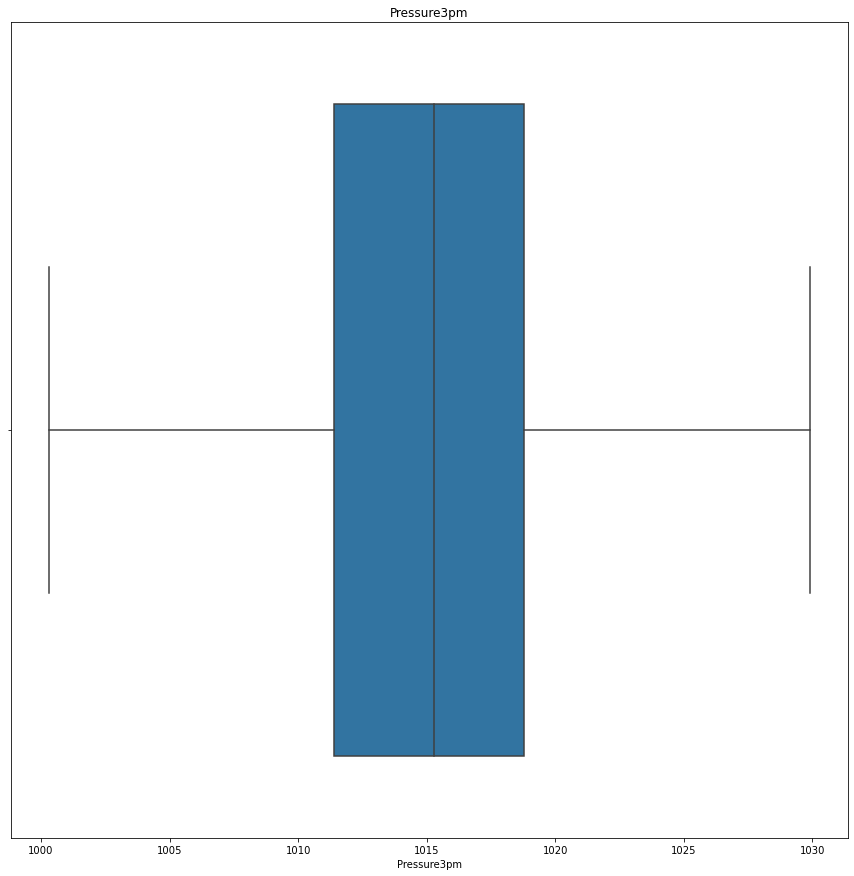

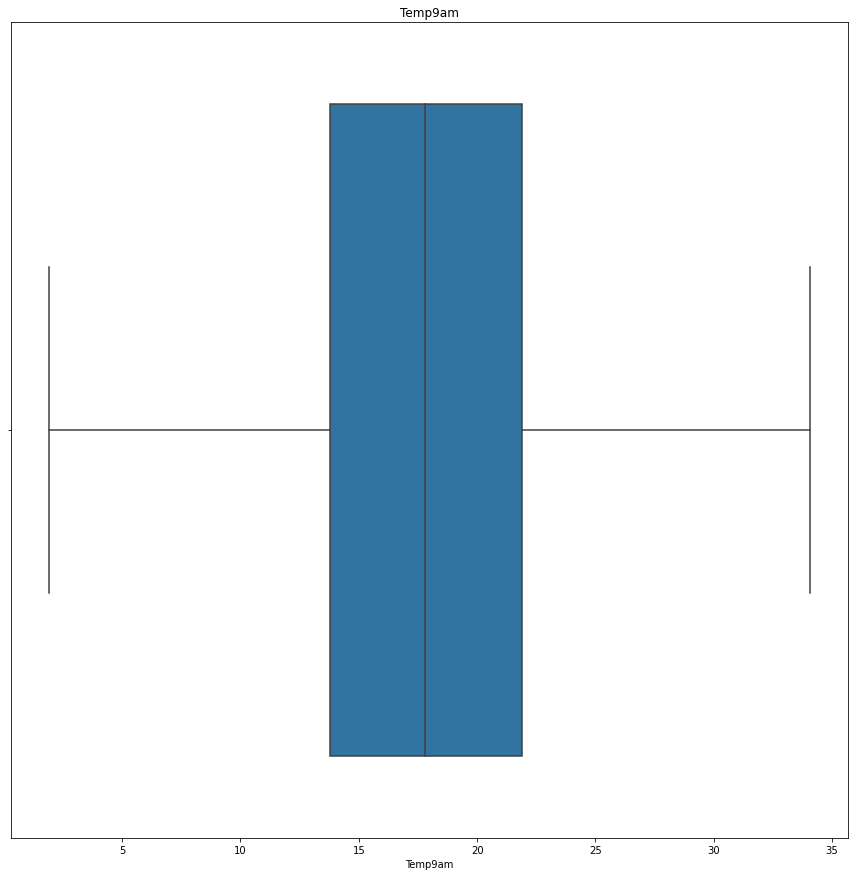

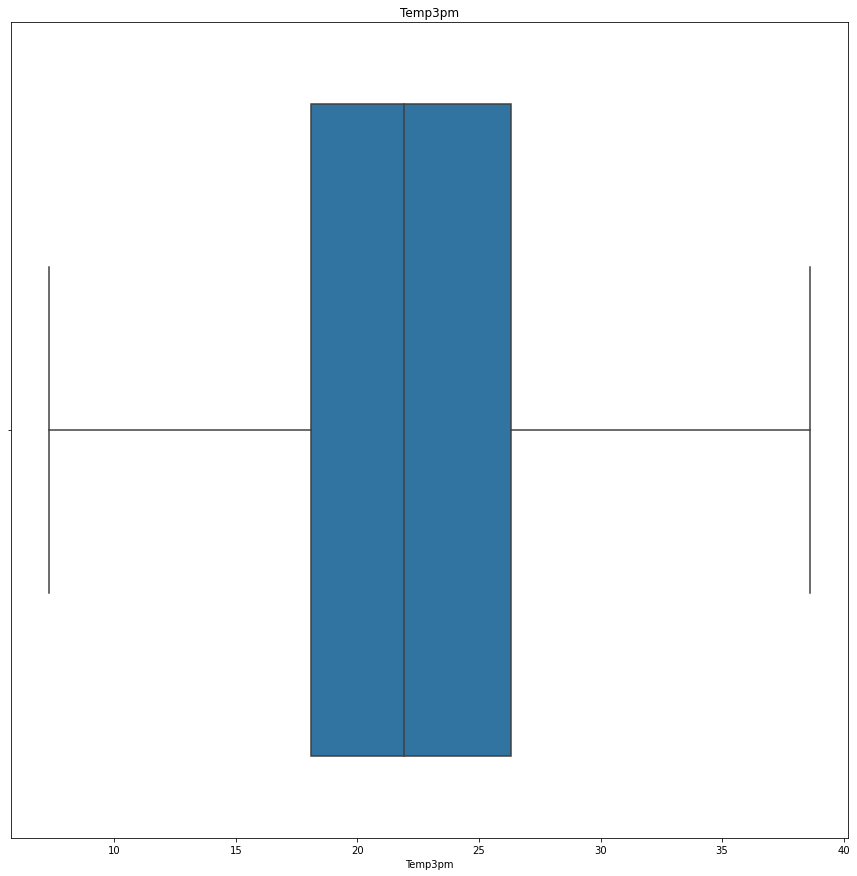

<Figure size 1080x1080 with 0 Axes>

In [60]:
for feature in continuous_feature:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

now the outliers is removed good to go:

In [61]:
X = data.drop(["RainTomorrow", "Date"], axis=1)
y = data["RainTomorrow"]


In [62]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, stratify = y, random_state = 123)


In [64]:
#using smote method balancing the target variable:


sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 4825, 1: 1493})
The number of classes after fit Counter({1: 4825, 0: 4825})


In [65]:
#scaling the data

from sklearn.preprocessing import StandardScaler


In [66]:
scaler=StandardScaler()

In [67]:
X= scaler.fit_transform(X)

In [68]:
X_train_res=X_train

In [69]:
y_train_res=y_train

# Predicting whether or not it will rain tomorrow:

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,roc_curve
from sklearn.tree import DecisionTreeClassifier

In [71]:
#definig the function for train and test the model:

def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(X_train)
        print("\n**********************************Train Result***************************************")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%")
    elif train == False :
        pred = clf.predict(X_test)
        print("\n**********************************Test Result****************************************")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:87.955049%

**********************************Test Result****************************************
Accuracy Score:83.388704%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1609
           1       0.70      0.51      0.59       498

    accuracy                           0.83      2107
   macro avg       0.78      0.72      0.74      2107
weighted avg       0.82      0.83      0.82      2107



In [75]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [76]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:100.000000%

**********************************Test Result****************************************
Accuracy Score:89.178927%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1609
           1       0.88      0.63      0.73       498

    accuracy                           0.89      2107
   macro avg       0.89      0.80      0.83      2107
weighted avg       0.89      0.89      0.88      2107



In [77]:
DT = DecisionTreeClassifier()

In [78]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:100.000000%

**********************************Test Result****************************************
Accuracy Score:83.198861%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1609
           1       0.64      0.67      0.65       498

    accuracy                           0.83      2107
   macro avg       0.77      0.78      0.77      2107
weighted avg       0.84      0.83      0.83      2107



In [80]:
from sklearn.model_selection import KFold,cross_val_score


In [81]:
cross_val_score(knn,X ,y ,cv=7)

array([0.82392027, 0.78820598, 0.78737542, 0.81395349, 0.7996675 ,
       0.82128013, 0.81878637])

In [82]:
cross_val_score(KNeighborsClassifier(),X,y,cv=7).mean()

0.8075984496913072

In [83]:
cross_val_score(rfc,X ,y ,cv=5).mean()

0.8481899109792286

In [84]:
cross_val_score(DT,X ,y ,cv=5).mean()

0.7774480712166172

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [87]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [88]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [89]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [90]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [91]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:85.628363%

**********************************Test Result****************************************
Accuracy Score:83.103939%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1609
           1       0.72      0.46      0.56       498

    accuracy                           0.83      2107
   macro avg       0.79      0.70      0.73      2107
weighted avg       0.82      0.83      0.82      2107



In [92]:
from sklearn.model_selection import RandomizedSearchCV


In [93]:
param_grid={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [94]:
randomsearch=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=10)


In [95]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [96]:
randomsearch.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': None}

In [97]:
rfc=RandomForestClassifier(max_depth=None, min_samples_leaf=3, min_samples_split=4,n_estimators=100)

In [98]:
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=4)

In [99]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:96.359607%

**********************************Test Result****************************************
Accuracy Score:87.233033%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1609
           1       0.86      0.55      0.67       498

    accuracy                           0.87      2107
   macro avg       0.87      0.76      0.80      2107
weighted avg       0.87      0.87      0.86      2107



In [100]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [101]:
gridsearch=GridSearchCV(estimator=DT,param_grid=param_grid,cv=5,n_jobs=-1)

In [102]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [103]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [104]:
DT=DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,max_leaf_nodes=9,min_samples_leaf=2)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=3)

In [105]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:82.731877%

**********************************Test Result****************************************
Accuracy Score:83.103939%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1609
           1       0.75      0.43      0.54       498

    accuracy                           0.83      2107
   macro avg       0.80      0.69      0.72      2107
weighted avg       0.82      0.83      0.81      2107



In [106]:
y_pred=DT.predict(X_test)

In [107]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [108]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.42771084 1.        ]
False positive Rate= [0.         0.04412679 1.        ]


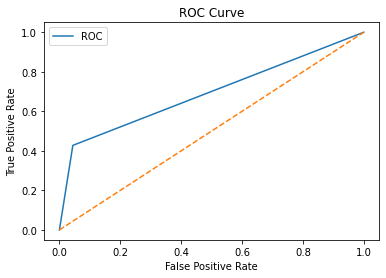

In [109]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [110]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.6917920282746899


In [111]:
y_pred=rfc.predict(X_test)

In [112]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [113]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.55220884 1.        ]
False positive Rate= [0.         0.02858919 1.        ]


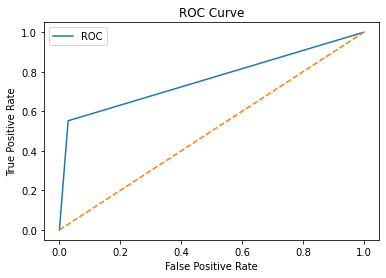

In [114]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [115]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.7618098247558287


In [116]:
y_pred=knn.predict(X_test)

In [117]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [118]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.46184739 1.        ]
False positive Rate= [0.         0.05469236 1.        ]


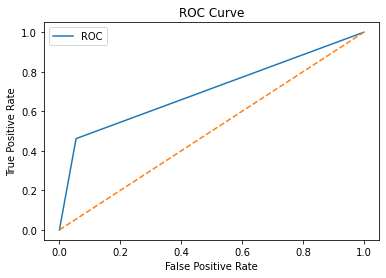

In [119]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [120]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.7035775170289611


In [121]:
final_model = RandomForestClassifier(max_depth=None, min_samples_leaf=3, min_samples_split=4,n_estimators=100)

In [122]:
final_model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=4)

In [123]:
import joblib

In [124]:
joblib.dump(final_model,'Rain prediction Project')

['Rain prediction Project']

# Predicting the amount of rainfall recorded for the day in mm:

In [153]:
X = data.drop(["Rainfall"], axis=1)
y = data["Rainfall"]


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, stratify = y, random_state = 123)


In [127]:
from sklearn.linear_model import LinearRegression


In [128]:
#model training
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [129]:
#checking r2 score for trained data
lr.score(X_train,y_train)

0.9522713531465479

In [130]:
#checking r2 score for test data
lr.score(X_test,y_test)

0.9524492903842695

In [131]:
y_pred = lr.predict(X_test)


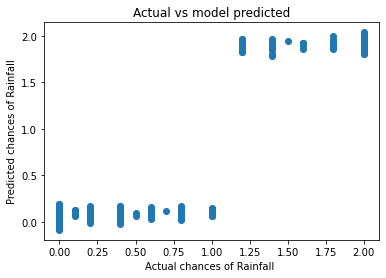

In [132]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chances of Rainfall ')
plt.ylabel('Predicted chances of Rainfall')
plt.title('Actual vs model predicted')
plt.show()

In [133]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [134]:
y_pred = lr.predict(X_test)

In [135]:
mean_absolute_error(y_test,y_pred) #mar

0.10204037004377492

In [136]:
mean_squared_error(y_test,y_pred) #mse #showing so much of error

0.031371074279432656

In [137]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report


In [138]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [139]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [140]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [141]:
createmodels(models,X,y,names)


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.4523,0.4627,0.6802,-0.47,0.3069
SVR,0.5062,0.7293,0.8540,-53.92,-0.0806
LinearRegression,0.1009,0.0274,0.1656,0.96,0.9512
Lasso,0.5977,0.5449,0.7381,-4.99,0.1990
Ridge,0.1013,0.0274,0.1656,0.96,0.9512
DecisionTreeRegressor,0.0867,0.0510,0.2259,0.92,0.9228
RandomForestRegressor,0.0872,0.0233,0.1525,0.96,0.9622
AdaBoostRegressor,0.1509,0.0361,0.1899,0.93,0.9395
GradientBoostingRegressor,0.0947,0.0265,0.1627,0.96,0.9532


In [142]:
from sklearn.model_selection import RandomizedSearchCV


In [143]:
params={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [144]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)


In [145]:
g.fit(X_train,y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [146]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=300)
{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 7}
0.9549736859832155


In [148]:
m=RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=4,n_estimators=300)
m.fit(X_train,y_train)
p=m.predict(X_test)
score=cross_val_score(m,X,y,cv=10)

In [149]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,y_test)),4))
print('R2 Score is',np.round(r2_score(p,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0936
Mean Squared Error is 0.0295
Root Mean Squared Error is 0.1718
R2 Score is 95.34
Mean of cross validaton Score is 95.4541


In [150]:
final_model=RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=4,n_estimators=300)
final_model.fit(X_train,y_train)
p=final_model.predict(X_test)
score=cross_val_score(final_model,X,y,cv=10)

In [151]:
import joblib

In [152]:
#saving the model:
joblib.dump(final_model,'Rainfall_prediction project')

['Rainfall_prediction project']